In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append('/home/traver/pymodules')
import hartware as hw

# Load raw features

In [3]:
feats = pd.read_table('./Data/binFeats-cells-metadata-lof-gof-emt-2931feats-808cells-Avana20q4.txt', sep='\t', index_col=0)
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2931 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2931)
memory usage: 2.3+ MB


In [4]:
cc_mat = feats.corr()

In [5]:
cc_list = hw.ut_as_list( cc_mat)
cc_list.sort_values('Value', ascending=False, inplace=True)
cc_list.head(25)

,Row,Column,Value
61343,urinary_tract,bladder_carcinoma,1.000000
5893,gastric,gastric_adenocarcinoma,1.000000
55517,colorectal,colorectal_adenocarcinoma,1.000000
27,plasma_cell,multiple_myeloma,1.000000
40961,peripheral_nervous_system,neuroblastoma,1.000000
32204,pancreas,exocrine,1.000000
35112,upper_aerodigestive,upper_aerodigestive_squamous,1.000000
32217,pancreas,exocrine_adenocarcinoma,0.968892
119322,exocrine,exocrine_adenocarcinoma,0.968892
20531,kidney,renal_cell_carcinoma,0.954318


# remove duplicates
### for each feature pair with corr > 0.9, remove the smaller one
### if same size, remove 'column'

In [6]:
while (cc_list.iloc[0]['Value'] > 0.9):
    print( cc_list.iloc[0])
    featA, featB = cc_list.iloc[0][['Row','Column']]
    sizeA = feats[featA].sum()
    sizeB = feats[featB].sum()
    if (sizeA > sizeB):
        feats.drop(featA, axis=1, inplace=True)
        print('Removing feature ' + featA)
    else:
        feats.drop(featB, axis=1, inplace=True)
        print('Removing feature ' + featB)
    cc_mat = feats.corr()
    cc_list = hw.ut_as_list( cc_mat)
    cc_list.sort_values('Value', ascending=False, inplace=True)

Row           urinary_tract
Column    bladder_carcinoma
Value                   1.0
Name: 61343, dtype: object
Removing feature bladder_carcinoma
Row            plasma_cell
Column    multiple_myeloma
Value                  1.0
Name: 27, dtype: object
Removing feature multiple_myeloma
Row       pancreas
Column    exocrine
Value          1.0
Name: 32181, dtype: object
Removing feature exocrine
Row                      gastric
Column    gastric_adenocarcinoma
Value                        1.0
Name: 5886, dtype: object
Removing feature gastric_adenocarcinoma
Row       peripheral_nervous_system
Column                neuroblastoma
Value                           1.0
Name: 40901, dtype: object
Removing feature neuroblastoma
Row                upper_aerodigestive
Column    upper_aerodigestive_squamous
Value                              1.0
Name: 35051, dtype: object
Removing feature upper_aerodigestive_squamous
Row                      colorectal
Column    colorectal_adenocarcinoma
Value       

In [7]:
cc_list.head(25)

,Row,Column,Value
5852,central_nervous_system,glioma,0.898764
32037,esophagus,esophagus_squamous,0.891585
26239,lung,NSCLC,0.837788
29142,lymphocyte,non_hodgkin_lymphoma,0.822070
87095,cholangiocarcinoma,intrahepatic,0.811832
63966,glioma,glioblastoma,0.803444
43677,urinary_tract,bladder_transitional_cell,0.782334
175362,MSI,RPL22_LOF,0.776233
14622,breast,ERneg_HER2neg,0.756449
11690,uterus,endometrial_adenocarcinoma,0.754268


In [8]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2918 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2918)
memory usage: 2.3+ MB


In [9]:
numCells, numFeatures = feats.shape
print(numCells, numFeatures)

808 2918


In [11]:
feats.to_csv('./Data/features-bool-deDuped-' + str(numFeatures) + 'feats-' + str(numCells) + 'cells.txt', sep='\t', index=True)

# Remove samples with NaN in pEss

In [12]:
bf = pd.read_table('./Data/table_Avana2020Q4_CRISPRcleanR_corrected_all', sep='\t', index_col=0)
bf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18111 entries, A1BG to ZZZ3
Columns: 808 entries, ACH-001172 to ACH-002510
dtypes: float64(808)
memory usage: 111.8+ MB


<AxesSubplot:>

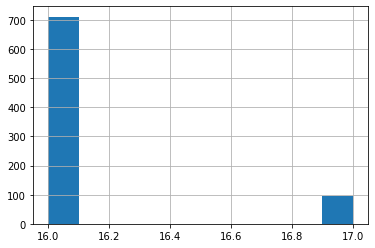

In [13]:
bf.isna().sum(0).hist() # samples

<AxesSubplot:>

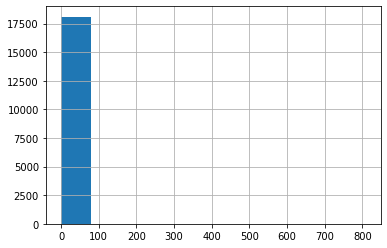

In [14]:
bf.isna().sum(1).hist() #genes

In [15]:
genes_with_nans_idx = where( bf.isna().sum(1) > 0)[0]
bf.index.values[ genes_with_nans_idx]

array(['DUX4', 'EIF3CL', 'GAGE12H', 'KRTAP5-8', 'NPIPA5', 'NPIPB6',
       'NPM1', 'RPL21', 'RPL39', 'RPS26', 'RPSA', 'TBC1D3B', 'USP17L10',
       'USP17L5', 'ZNF254', 'ZNF732', 'ZNF85'], dtype=object)

In [16]:
bf.drop( bf.index.values[genes_with_nans_idx], axis=0, inplace=True)
bf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18094 entries, A1BG to ZZZ3
Columns: 808 entries, ACH-001172 to ACH-002510
dtypes: float64(808)
memory usage: 111.7+ MB


In [17]:
bf.isna().sum().sum()

0

In [18]:
prEss = bf.copy().T
#
# binarize at BF>=10
#
prEss[prEss<10]=0
prEss[prEss>0]=1

In [19]:
prEss = prEss.astype( bool)
prEss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18094 entries, A1BG to ZZZ3
dtypes: bool(18094)
memory usage: 14.0+ MB


In [20]:
numCells, numGenes = prEss.shape

In [22]:
prEss.to_csv('./Data/prEss-bool-' + str(numGenes) + 'genes-' + str(numCells) + 'cells-noNans.txt', sep='\t', index=True)
